### Задача 1

Для начала давайте проанализируем, насколько быстро растёт аудитория нашего сервиса, и посмотрим на динамику числа пользователей и курьеров. 

Задание:

Для каждого дня, представленного в таблицах user_actions и courier_actions, рассчитайте следующие показатели:

- Число новых пользователей.
- Число новых курьеров.
- Общее число пользователей на текущий день.
- Общее число курьеров на текущий день.

Поля в результирующей таблице: ```date, new_users, new_couriers, total_users, total_couriers```

Пояснение: 

Новыми будем считать тех пользователей и курьеров, которые в данный день совершили своё первое действие в нашем сервисе. 
Общее число пользователей/курьеров на текущий день — это результат сложения числа новых пользователей/курьеров в текущий день со значениями аналогичного показателя всех предыдущих дней.

Новыми будем считать тех пользователей и курьеров, которые в данный день совершили своё первое действие в нашем сервисе.

In [ ]:
WITH users_first_actions AS (
    SELECT  user_id,
            MIN(time)::date as first_date
    FROM user_actions
    GROUP BY user_id
),
    couriers_first_actions AS (
    SELECT  courier_id,
            MIN(time)::date as first_date
    FROM courier_actions
    GROUP BY courier_id
),
    users_and_couriers_first_actions AS (
    SELECT * FROM users_first_actions
    JOIN couriers_first_actions
    USING(first_date)
),
    counts_by_date AS (
    SELECT  first_date as date,
        COUNT(DISTINCT user_id) as new_users,
        COUNT(DISTINCT courier_id) as new_couriers
    FROM users_and_couriers_first_actions
    GROUP BY first_date
    ORDER BY date
    ),
    
    metrics AS (
    SELECT  date,
        new_users,
        new_couriers,
        SUM(new_users) OVER (ORDER BY date)::int AS total_users,
        SUM(new_couriers) OVER (ORDER BY date)::int AS total_couriers
FROM counts_by_date)

![1.New Users and Couriers by Date .png](<attachment:1.New Users and Couriers by Date .png>)
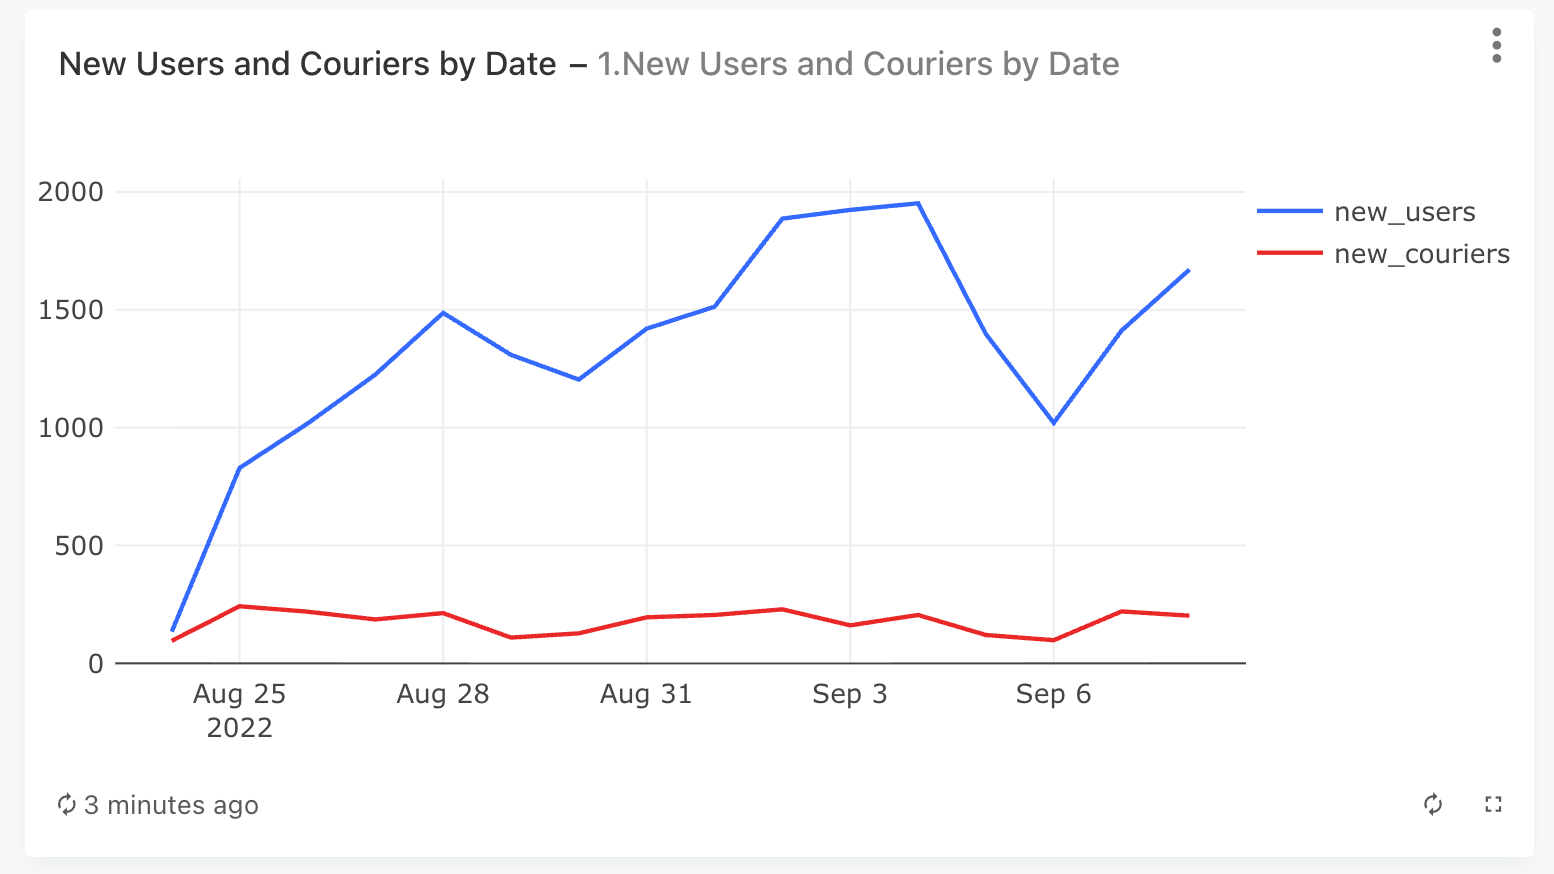

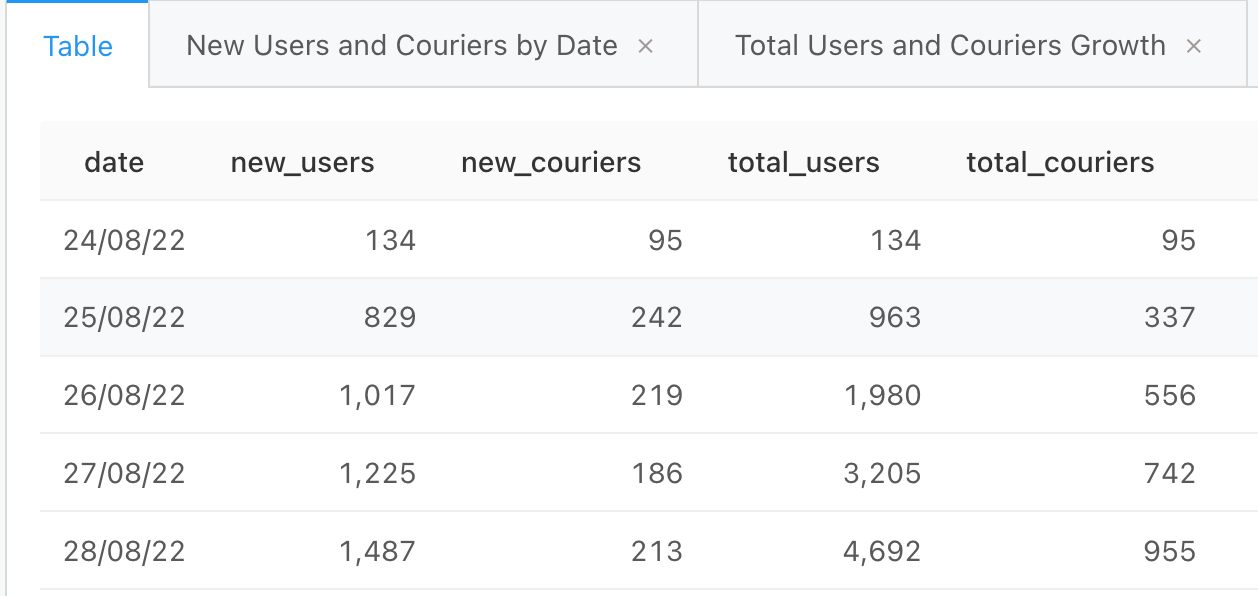